# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import collections
import datetime

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

### Step 3. Assign it to a variable apple

In [2]:
apple = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv')

### Step 4.  Check out the type of the columns

In [4]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
Date         8465 non-null object
Open         8465 non-null float64
High         8465 non-null float64
Low          8465 non-null float64
Close        8465 non-null float64
Volume       8465 non-null int64
Adj Close    8465 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.0+ KB


### Step 5. Transform the Date column as a datetime type

In [5]:
apple['Date'] = pd.to_datetime(apple['Date'])

### Step 6.  Set the date as the index

In [7]:
apple = apple.set_index('Date')

### Step 7.  Is there any duplicate dates?

In [21]:
apple.index.is_unique

True

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [23]:
apple.sort_index(ascending = True, inplace = True)

### Step 9. Get the last business day of each month

In [26]:
apple.resample('BM').mean()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333
1981-05-29,29.052000,29.188000,28.995000,28.995000,7.380240e+06,0.452500
1981-06-30,30.801818,30.876364,30.703636,30.703636,1.080189e+07,0.477727
1981-07-31,24.436364,24.531818,24.374545,24.374545,7.584436e+06,0.379545
1981-08-31,22.336500,22.386500,22.218500,22.218500,6.857760e+06,0.345000


### Step 10.  What is the difference in days between the first day and the oldest

In [27]:
apple.index[0] - apple.index[-1]

Timedelta('-12261 days +00:00:00')

### Step 11.  How many months in the data we have?

In [35]:
len(apple.resample('BM').mean())

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

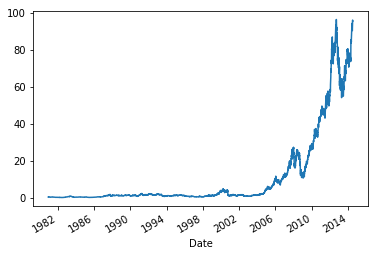

In [52]:
apple['Adj Close'].plot()

### BONUS: Create your own question and answer it.